# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>

# Exercise 2.1) Integrals

In this section, we want to calculate the following integral using Monte Carlo techniques:

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2)dx = 1$$

We will use the mean value method: we will estimate that

$$I \approx \frac{b-a}{N} \sum_{i=1}^N f(x_i)$$

where $a$ and $b$ are the integration limits, $x_i$ are samples drawn from a certain probability distribution, and N is the number of samples. The purpose of this exercise is to highlight the improvement that importance sampling techniques can bring to this type of calculation.

In all cases, we evaluated the integrand function at $10^4$ points and divided the results into $10^2$ blocks.

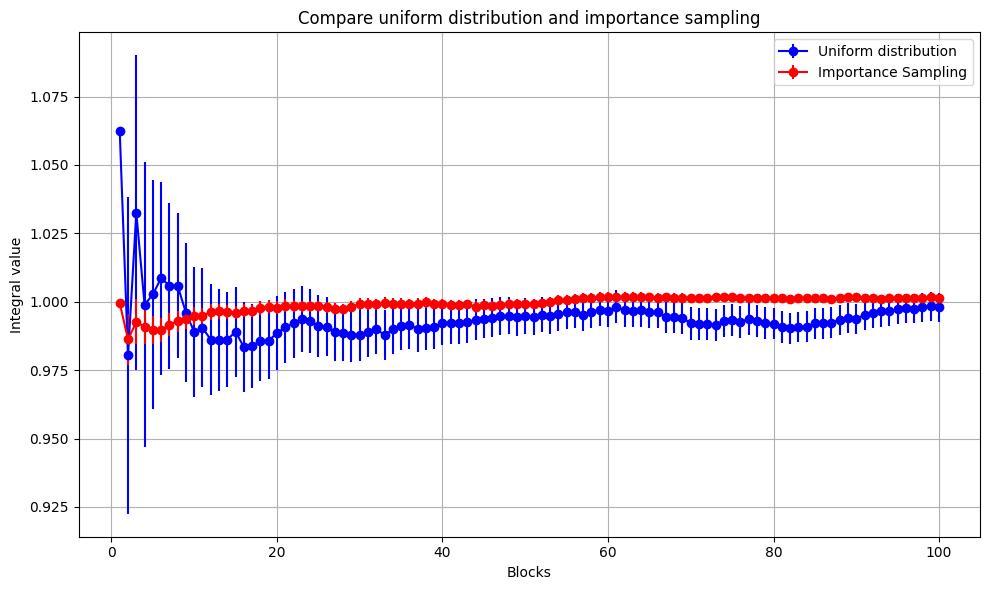

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_unif, a_unif, err_unif = np.loadtxt("punto21unif.out", usecols=(0, 1, 2), delimiter="\t", unpack=True)
n_imp, a_imp, err_imp = np.loadtxt("punto21impsampling.out", usecols=(0, 1, 2), delimiter="\t", unpack=True)

plt.figure(figsize=(10, 6))

plt.errorbar(n_unif, a_unif, yerr=err_unif, fmt='-o', color='b', label='Uniform distribution')

plt.errorbar(n_imp, a_imp, yerr=err_imp, fmt='-o', color='r', label='Importance Sampling')

plt.xlabel('Blocks')
plt.ylabel('Integral value')
plt.title('Compare uniform distribution and importance sampling')
plt.grid(True)
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

For the importance sampling we considered the probability distribution

$$p(x) = 2(1-x)$$

This function approximates the behavior of the integrand in the considered domain (see figure below). We therefore expect that the precision obtained with this method will be greater. Another advantage is that the inverse of the cumulative distribution is $F^{-1}(x) = 1 - \sqrt{1-x}$; being known, the distribution is easy to sample from.

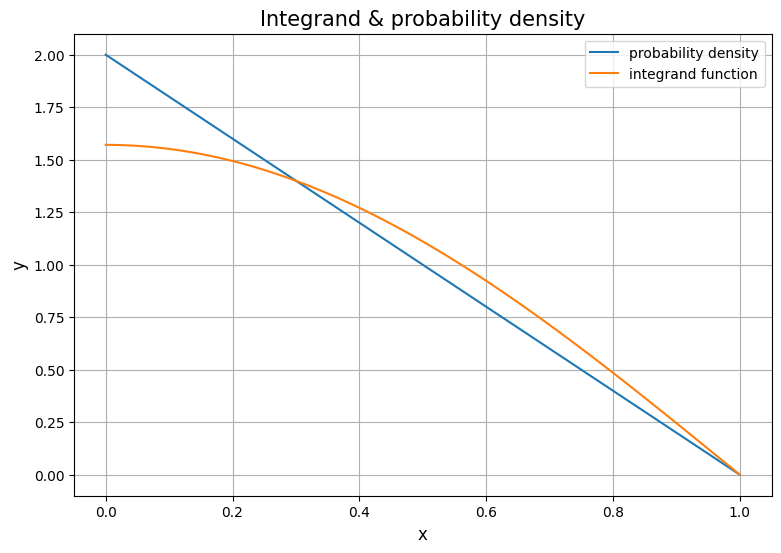

In [3]:
import math

def f(x):
    return math.pi/2.*np.cos(math.pi*x/2.)

xf = np.linspace(0,1,100)
yp = 2*(1-xf)
yf = f(xf)

plt.figure(figsize=(9,6))
plt.title('Integrand & probability density',fontsize=15)
plt.plot(xf,yp,label='probability density')
plt.plot(xf,yf,label='integrand function')
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.grid(True)
plt.legend()

## Exercise 2.2) Random Walks
We now focus on simulating Random Walks, which are trajectories of points that move by a certain fixed value $a$ at each step in a three-dimensional space in a random direction (in our case). We consider two possibilities:

- **Discrete RW**: at each iteration, the point moves on a discrete cubic lattice with step $a$. The possible movements are thus shifting by $a$ forward or backward along one of the system's axes.

- **Continuous RW**: at each iteration, the point moves a length $a$ in any direction.

The aim of the simulation is to produce data related to $\sqrt{\langle |r|^2 \rangle}$ and calculate its uncertainty as a function of the random walk steps. We generated $10^4$ random walks of $10^2$ steps each, and obtained the uncertainties through data blocking. We also performed a fit of $\sqrt{\langle |r|^2 \rangle}$ with a function of the type $f = k\sqrt{x}$. The results are shown in the figures.

In [5]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 5.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Optimal parameter k: 1.0000 ± 0.0000


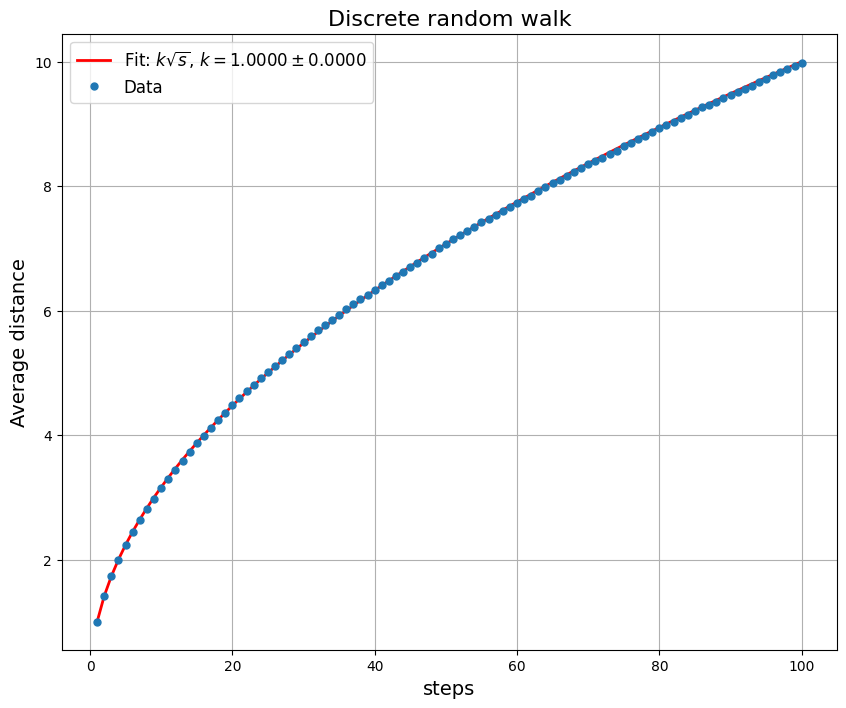

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

n, a, err = np.loadtxt("RandomWalkDisc.out", usecols=(0,1,2), delimiter="\t", unpack=True)

#Added for too small errors
err[err == 0] = 1e-10

def fit_function(x, k):
    return k * np.sqrt(x)

popt, pcov = curve_fit(fit_function, n, a, sigma=err)

k_opt = popt[0]
k_err = np.sqrt(np.diag(pcov))[0]

print(f"Optimal parameter k: {k_opt:.4f} ± {k_err:.4f}")

plt.figure(figsize=(10, 8))  # Aumenta le dimensioni del grafico

plt.errorbar(n, a, fmt='o', label='Data', capsize=5, markersize=5, elinewidth=2)
plt.plot(n, fit_function(n, *popt), 'r-', label=f'Fit: $k\sqrt{{s}}$, $k={k_opt:.4f} \pm {k_err:.4f}$', linewidth=2)

plt.xlabel('steps', fontsize=14)
plt.ylabel('Average distance', fontsize=14)
plt.title('Discrete random walk', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Visualizzare 
plt.show()

Optimal parameter k: 0.6125 ± 0.0002


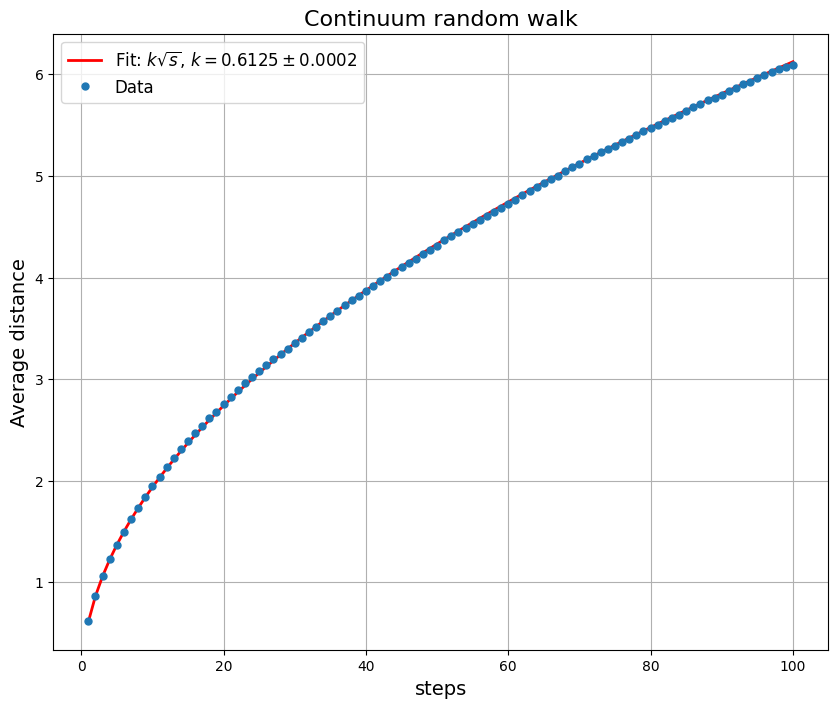

In [2]:
n, a, err = np.loadtxt("RandomWalkCon.out", usecols=(0,1,2), delimiter="\t", unpack=True)

err[err == 0] = 1e-10

def fit_function(x, k):
    return k * np.sqrt(x)

popt, pcov = curve_fit(fit_function, n, a, sigma=err)

k_opt = popt[0]
k_err = np.sqrt(np.diag(pcov))[0]

print(f"Optimal parameter k: {k_opt:.4f} ± {k_err:.4f}")

plt.figure(figsize=(10, 8))  # Aumenta le dimensioni del grafico

plt.errorbar(n, a, fmt='o', label='Data', capsize=5, markersize=5, elinewidth=2)
plt.plot(n, fit_function(n, *popt), 'r-', label=f'Fit: $k\sqrt{{s}}$, $k={k_opt:.4f} \pm {k_err:.4f}$', linewidth=2)

plt.xlabel('steps', fontsize=14)
plt.ylabel('Average distance', fontsize=14)
plt.title('Continuum random walk', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()
